In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Задание 7.2

Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = list(df.drop('country', axis=1).columns)
X = scaler.fit_transform(df.drop('country', axis=1))
X[0][0]

1.2915323778422956

In [10]:
X = pd.DataFrame(X, columns=features)

Задание 7.3

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

<AxesSubplot: >

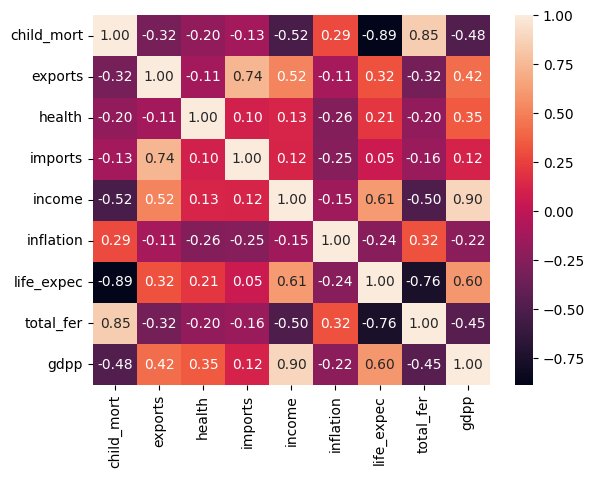

In [17]:
sns.heatmap(X.corr(), annot=True, fmt='.2f')

Задание 7.4

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [19]:
X.mean()

child_mort   -3.722904e-17
exports       2.127373e-16
health        5.504579e-16
imports       2.765585e-16
income       -7.977650e-17
inflation    -1.063687e-17
life_expec    3.696311e-16
total_fer     3.044803e-16
gdpp          5.850277e-17
dtype: float64

In [20]:

X_std  = (X - X.mean()) / (X.std())

cov_mat = np.cov(X.T)
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
eigen_val / eigen_val.sum() * 100

array([45.95173979, 17.18162565, 13.0042589 , 11.05316181,  7.34021142,
        2.48423468,  0.74305562,  0.98128174,  1.2604304 ])

<AxesSubplot: >

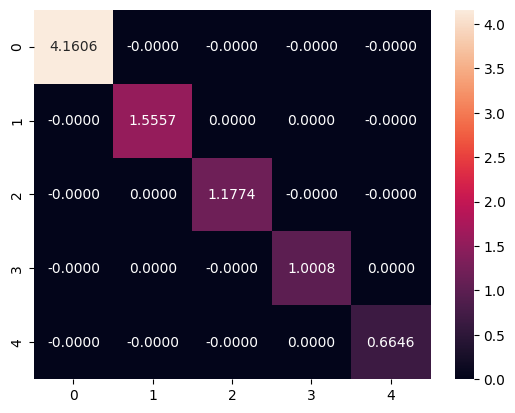

In [27]:
from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=5)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(X)
sns.heatmap(np.cov(principalComponents.T), annot=True, fmt='0.4f')

Задание 7.7

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<AxesSubplot: xlabel='Кластеров', ylabel='Силуэт'>

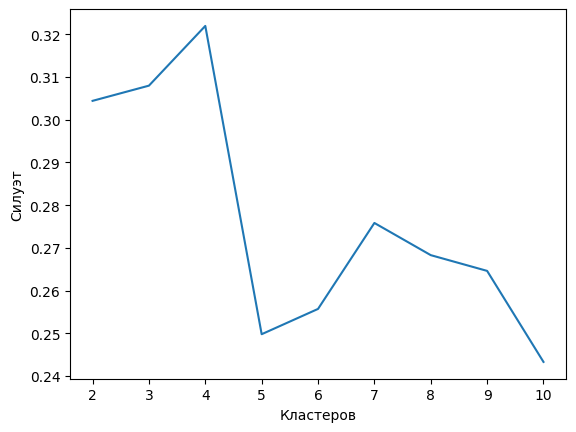

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

res_list = list()
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(principalComponents)
    sil = silhouette_score(principalComponents,kmeans.labels_)
    res_list.append([k, sil])
    
res_list = pd.DataFrame(res_list, columns=['Кластеров', 'Силуэт'])
sns.lineplot(res_list, y = 'Силуэт', x= 'Кластеров')

In [39]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(principalComponents)

X['cluster'] = kmeans.labels_

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: ylabel='cluster'>

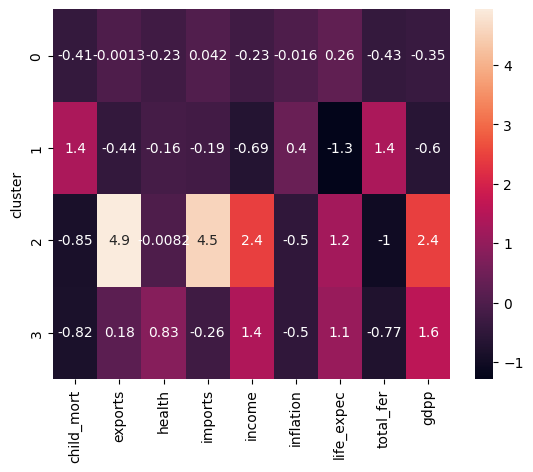

In [40]:
sns.heatmap(X.groupby('cluster')[features].mean(), annot=True)

In [52]:
df['cluster'] = kmeans.labels_
df[df['cluster'] == 1][['country','life_expec']].sort_values(by='life_expec').iloc[:3,:]

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
